In [1]:
import numpy as np
import pandas as pd
from scipy.spatial import distance
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import DistanceMetric

### Notes

[Link](https://www.intechopen.com/chapters/40860)

Opinions on near wake length have varied, but can be considered to fall in the range of 1 to 5 rotor diameters (1D to 5D) downstream from the rotor disc. 

The full extent of far wake length is currently still under study, but may range from up to 15D for onshore sites [8] and up to 14 km for offshore [9]. The 5D to 15D wake region has been defined as an intermediate wake region by some [10], with the far wake pertaining to distances farther than 15D.

Where average rotor diameter in 2020 being 125 meters
 - 5D = 625 meters
 - 15D = 1875 meters

In [2]:
coord = pd.read_csv('/Users/wastechs/Documents/git-repos/wake_effect/data/Pos_WTG_Brasil.csv')

In [3]:
coord.head(11)

,WTG,Alt.,Lat.,Long.
0,TOR,41.5,-4.190,-38.080
1,W01,33.9,-4.185,-38.084
2,W02,32.5,-4.183,-38.086
3,W03,42.6,-4.183,-38.088
4,W04,42.1,-4.184,-38.087
5,W05,42.8,-4.184,-38.089
6,W06,50.0,-4.185,-38.087
7,W07,34.7,-4.186,-38.083
8,W08,36.4,-4.187,-38.088
9,W09,34.7,-4.187,-38.083


### Haversine

In [4]:
# With longitude preprocessing

haversine = DistanceMetric.get_metric('haversine')

coord['lat_rad'] = np.radians(coord['Lat.'])
coord['long_rad'] = np.radians(coord['Long.'])

# Kilometers
#haversine.pairwise(coord[['lat_rad', 'long_rad']].to_numpy())*6373
# Meters
#haversine.pairwise(coord[['lat_rad', 'long_rad']].to_numpy())*6373000

# Calculate haversine distances (in meters)
haversine_distances = haversine.pairwise(coord[['lat_rad', 'long_rad']].to_numpy())*6373000
# Lower triangular matrix
#haversine_triangular = np.tril(haversine_distances)
# Convert to dataframe
haversine_df = pd.DataFrame(
    haversine_distances,
    columns=coord['WTG'].unique(),
    index=coord['WTG'].unique()
)

subset_proximity_haver = haversine_df[(haversine_df <= 1875) & (haversine_df > 625)]
subset_proximity_haver.fillna(value=0, inplace=True)
subset_proximity_haver[subset_proximity_haver > 0] = 1

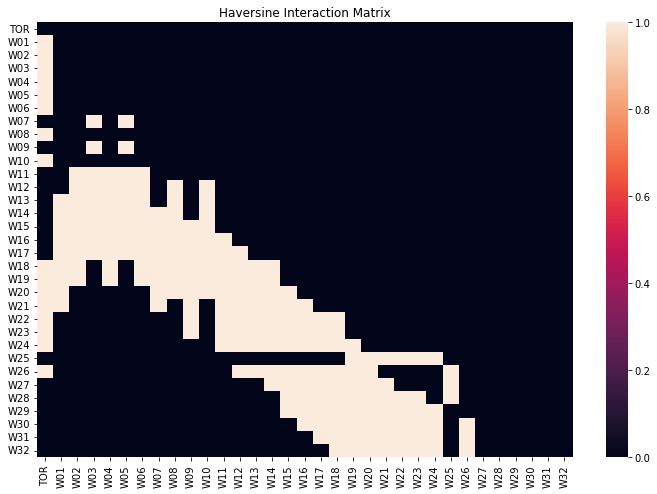

In [19]:
plt.figure(figsize=(12, 8))
sns.heatmap(subset_proximity_haver)
plt.title('Haversine Interaction Matrix')
plt.show()

In [26]:
subset_proximity_haver.to_csv('/Users/wastechs/Documents/git-repos/wake_effect/data/haversine_interaction_full.csv')

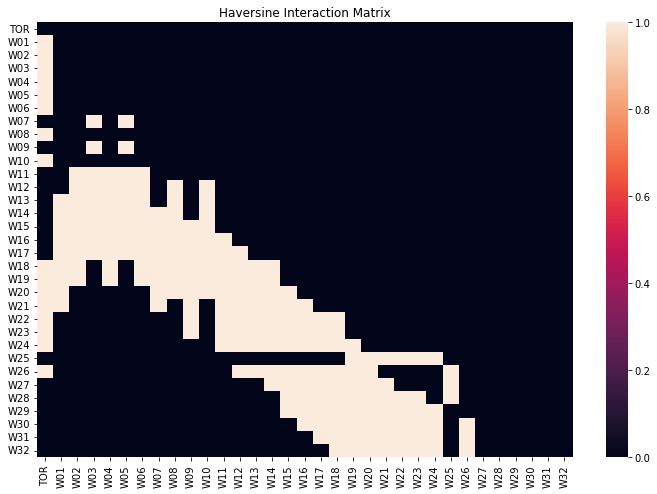

In [18]:
haversine = DistanceMetric.get_metric('haversine')

coord['lat_rad'] = np.radians(coord['Lat.'])
coord['long_rad'] = np.radians(coord['Long.'])

# Kilometers
#haversine.pairwise(coord[['lat_rad', 'long_rad']].to_numpy())*6373
# Meters
#haversine.pairwise(coord[['lat_rad', 'long_rad']].to_numpy())*6373000

# Calculate haversine distances (in meters)
haversine_distances = haversine.pairwise(coord[['lat_rad', 'long_rad']].to_numpy())*6373000
# Lower triangular matrix
haversine_triangular = np.tril(haversine_distances)
# Convert to dataframe
haversine_df = pd.DataFrame(
    haversine_triangular,
    columns=coord['WTG'].unique(),
    index=coord['WTG'].unique()
)

subset_proximity_haver = haversine_df[(haversine_df <= 1875) & (haversine_df > 625)]
subset_proximity_haver.fillna(value=0, inplace=True)
subset_proximity_haver[subset_proximity_haver > 0] = 1

plt.figure(figsize=(12, 8))
sns.heatmap(subset_proximity_haver)
plt.title('Haversine Interaction Matrix')
plt.show()

In [32]:
subset_proximity_haver.to_csv('/Users/wastechs/Documents/git-repos/wake_effect/data/haversine_interaction.csv')

### Euclidean

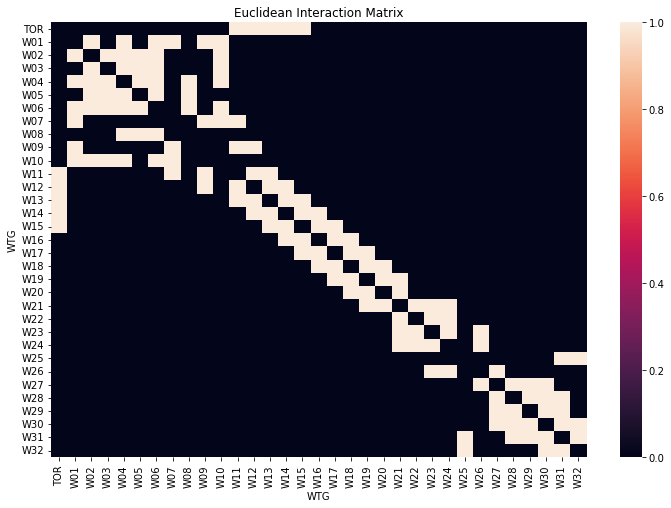

In [23]:
lat = coord['Lat.'].values
long = coord['Long.'].values

coords = []

for lat, long in zip(lat, long):
    coords.append((lat, long))

euclid_distances = pd.DataFrame(
    distance.cdist(coords, coords, 'euclidean'), 
    columns=coord['WTG'],
    index = coord['WTG'])

subset_proximity = euclid_distances[(euclid_distances <= 0.0035) & (euclid_distances > 0.0)]
subset_proximity.fillna(value=0, inplace=True)
subset_proximity[subset_proximity > 0] = 1

plt.figure(figsize=(12, 8))
sns.heatmap(subset_proximity)
plt.title('Euclidean Interaction Matrix')
plt.show()

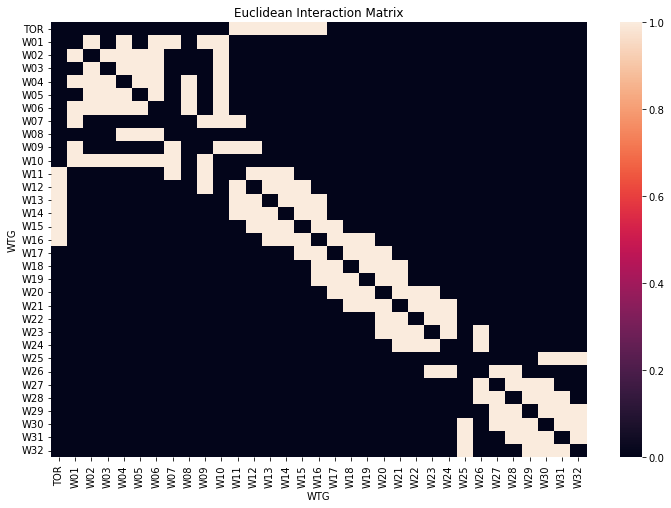

In [21]:
lat = coord['Lat.'].values
long = coord['Long.'].values

coords = []

for lat, long in zip(lat, long):
    coords.append((lat, long))

euclid_distances = pd.DataFrame(
    distance.cdist(coords, coords, 'euclidean'), 
    columns=coord['WTG'],
    index = coord['WTG'])

subset_proximity = euclid_distances[(euclid_distances <= 0.004) & (euclid_distances > 0.0)]
subset_proximity.fillna(value=0, inplace=True)
subset_proximity[subset_proximity > 0] = 1

plt.figure(figsize=(12, 8))
sns.heatmap(subset_proximity)
plt.title('Euclidean Interaction Matrix')
plt.show()

In [31]:
subset_proximity.to_csv('/Users/wastechs/Documents/git-repos/wake_effect/data/euclid_interaction_full.csv')

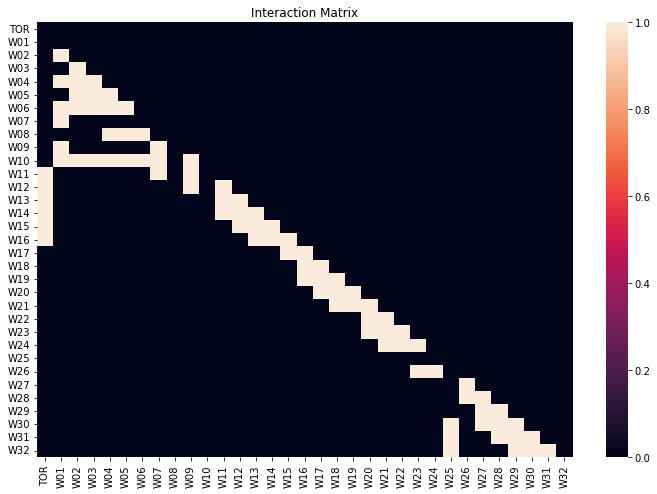

In [16]:
lat = coord['Lat.'].values
long = coord['Long.'].values

coords = []

for lat, long in zip(lat, long):
    coords.append((lat, long))

euclid_distances = distance.cdist(coords, coords, 'euclidean')

euclid_triangular = np.tril(euclid_distances)

euclid_df = pd.DataFrame(
    euclid_triangular,
    columns=coord['WTG'].unique(),
    index = coord['WTG'].unique()
)

subset_proximity_euclid = euclid_df[(euclid_df <= 0.004) & (euclid_df > 0.0)]
subset_proximity_euclid.fillna(value=0, inplace=True)
subset_proximity_euclid[subset_proximity_euclid > 0] = 1

plt.figure(figsize=(12, 8))
sns.heatmap(subset_proximity_euclid)
plt.title('Interaction Matrix')
plt.show()

In [32]:
subset_proximity_euclid.to_csv('/Users/wastechs/Documents/git-repos/wake_effect/data/euclid_interaction.csv')

### Geographic Visualization of Turbines

In [33]:
px.set_mapbox_access_token('pk.eyJ1IjoiZ3N0ZWNoc2NodWx0ZSIsImEiOiJja3g0d21vZDAyZnkwMndsYTM0ZjY0cHYwIn0.zEAHc1MIWOrqUbfPe1pB8g')

fig = px.scatter_mapbox(coord, lat="Lat.", lon="Long.",color="WTG",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=20,zoom=12)
fig.show()